<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/intro_to_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用
地理情報とは（平たく言えば）緯度・経度といった位置情報と経済データ・植生データ等を重ね，政策立案等に活かすことを目指している。また，地理情報を扱うシステムを GIS（Geographic Information System)と呼ぶ。

さらに「地理情報」を「地理空間情報」と呼ぶ場合もある。
これは

- 空間的な情報：地球上での位置や形状に関するデータ

を強く意識した用語である。また，「空間的な情報」に紐づけられる（前述の）経済データや植生データを「属性情報」と呼ぶ。

地理情報の活用に関して，ESRI社が牽引している。

（参考）GIS基礎解説：地理情報と GIS データモデル

https://www.esrij.com/gis-guide/gis-datamodel/gis-datamodel/

## 必要なパッケージのインストール
Python にて地理情報を扱うためのライブラリが GeoPandas である。

geopandas とは pandasの拡張で，地理情報を含むデータをpandasのように表形式で扱うことができるGIS系のPythonライブラリである。

### geopandas のインストール (Google Colab / Linux の場合)
geopandas をインストールすると，以下のパッケージも併せてインストールされる。
- geopanda
- Fiona
- pyporj
- Shapely

In [5]:
!pip install geopandas

### geopandas のインストール (Windows 上の Anaconda の場合)
pip でなく，以下の conda コマンドを conda prompt 上で実行する。

    conda intall -c conda-forge geopandas

In [ ]:
!pip install descartes

## geopandas で世界地図を表示
どのサイトを見ても，最初は geppandas 付随のデータを利用し，世界地図を表示するものらしい。

以下では geopandas に含まれるデータセット(dataset)のうち 'naturalearth_lowres' を読み込んでいる。データセットを指定し，read_file() メソッドに渡すことでデータを読み込める。

また，pandas にて扱う地理情報のデータ型を 'geopandas.geodataframe.GeoDataFrame' である。

In [ ]:
import geopandas
import matplotlib.pyplot as plt

dataset = geopandas.datasets.get_path('naturalearth_lowres') # データセットの指定
world = geopandas.read_file(dataset) # データセットの読み込み

print(type(world)) # データ型の確認

<class 'geopandas.geodataframe.GeoDataFrame'>


#### 読み込んだデータの可視化
GeoDataFrame に対して plot() メソッドを適用することで可視化できる。

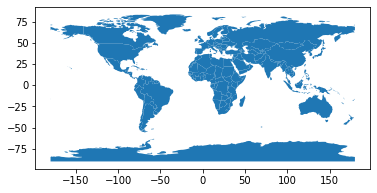

In [ ]:
world.plot()

#### 変数 world の中身をみてみよう
pandas と同様，表形式でデータが格納されている。
ここで，geometry 列が重要であり，
領域を表す POLYGON, 複数の領域が集合した MULTOPLYGON，線を表す LINE, 点を表す POINT が格納される。

以下では オセアニア(Oceania)大陸に属するフィジー(Fiji)が MULTIPOLYGON で，またアフリカ(Africa)大陸に属するタンザニア(Tanzania)が POLYGON で表現されている

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### 日本のデータを抽出する
特定の行を抽出する方法は Pandas と同様である。

以下に日本(Japan)のデータを取り出すコードを示す。geometry が MULTIPOLYGON で構成されているのは，九州，本州，四国，北海道および複数の島々が存在するからだろう。

In [ ]:
japan = world[world['name']=='Japan']
japan

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


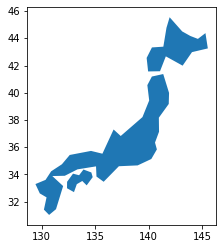

In [ ]:
# 可視化してみたが，島々が反映されていない。
# 世界地図から抜き出したため，細かい箇所はカットされている？
japan.plot()

### 属性情報の可視化
改めて world の中身を見てみると，pop_est および gdp_md_est の列が含まれていることが分かる。pop_est は population(人口)，gdp_md_est はGDP(国民総生産)を表す。

gdp_md は　million dollar 単位での GDP という意味だろう。（多分）

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


人口／GDPを世界地図に反映させるには plot(columns='列名') と指定する。

以下に人口を各国に反映させた結果を示す。

(注) 南極大陸には定住する住民がいないため，地理情報(GeoDataFrame)から除去する。

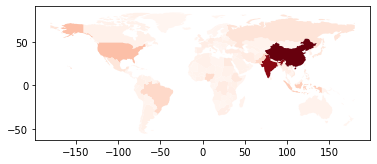

In [ ]:
# 南極大陸 (Antarctica) を除去した上で pop_est (country population)で色付け
world = world[world.name != 'Antarctica']
world.plot(column='pop_est', cmap='Reds')

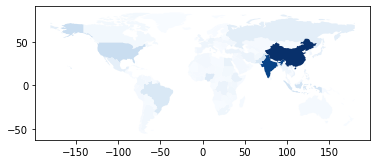

In [ ]:
# 可視化のバリエーション (1)：colormap の変更
world.plot(column='pop_est', cmap='Blues')

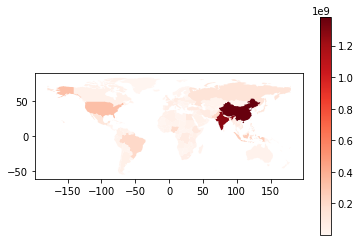

In [ ]:
# 可視化のバリエーション (2)：color bar の表示
# color bar は凡例の扱いであるため，legend=True と設定する
world.plot(column='pop_est', cmap='Reds', legend=True)

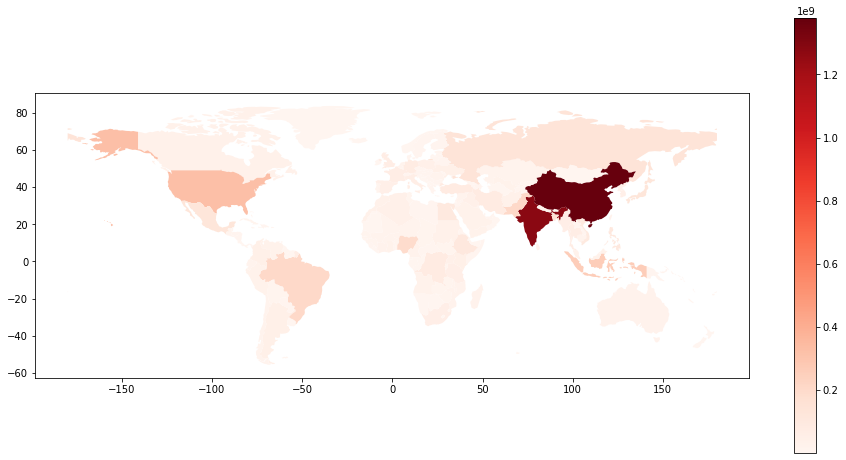

In [ ]:
# 可視化のバリエーション (3)：図のサイズの変更
# figsizeを指定する
world.plot(column='pop_est', cmap='Reds', legend=True, figsize=(16,8))

## （演習）各国の GDP を可視化してみよう

# Shape ファイルの利用
地理情報データは shape file として提供される（場合が大部分である）

標準的な日本地図の shape file "全国市区町村界データ" が ESRIジャパンから提供されている。

### (準備) Google Drive のマウント

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shape file の入手
| 製品 | ESRIジャパン

https://www.esrij.com/products/japan-shp/

上記より "全国市区町村界データ" をダウンロードすると，japan_ver821.zip が得られる。これを適当なディレクトリへ展開する。
展開すると，japan_ver821.shp を含む複数のファイルが得られるから，それらを同一のフォルダに置いておく。

In [6]:
import geopandas as gpd

# シェイプファイルからのデータ読み込み
# (注意) ファイルの置き場所をフルパスで与えること
path = r'/content/drive/My Drive/BASE2/GeoData/japan_ver821/japan_ver821.shp'
japan = gpd.read_file(path, encoding='shiftjis')

In [ ]:
# データの中身を覗き見る
japan.head()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",235449.0,141734.0,"POLYGON ((141.34233 43.06682, 141.35520 43.068..."
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286112.0,151891.0,"POLYGON ((141.40839 43.18395, 141.40427 43.182..."
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",261777.0,142078.0,"POLYGON ((141.44698 43.15513, 141.44860 43.153..."
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",212671.0,122062.0,"POLYGON ((141.46569 43.10000, 141.46812 43.097..."
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",222504.0,126579.0,"POLYGON ((141.38479 43.04660, 141.38558 43.047..."


(コメント) 上記は北海道・札幌市が見えている。札幌市は政令指定都市でさるため，区単位で POLYGON が設定されている。


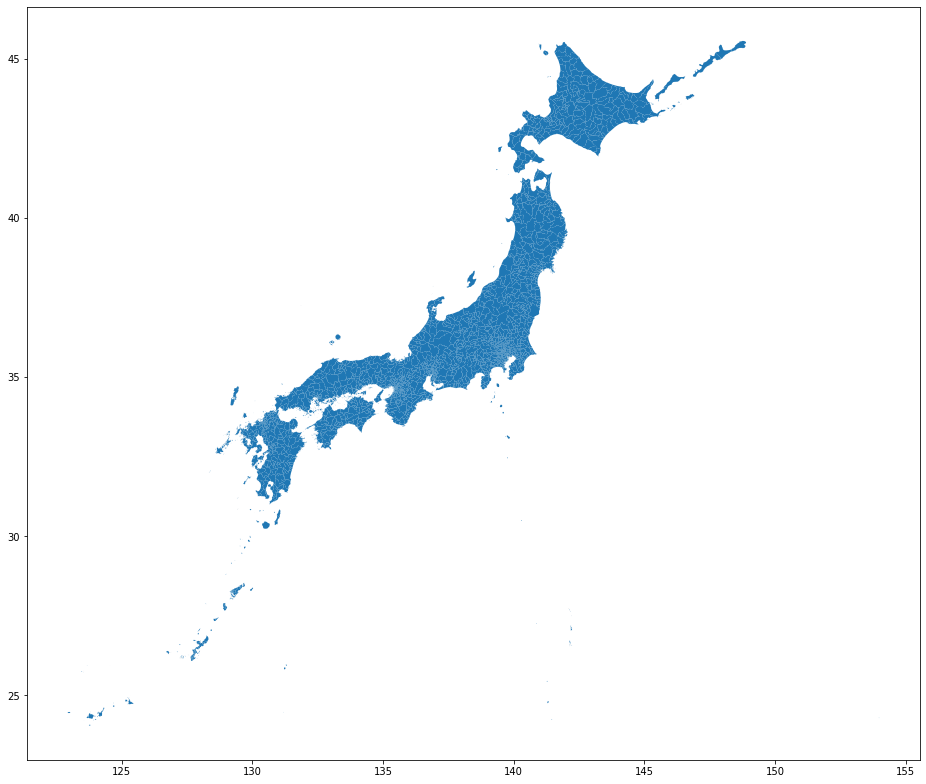

In [ ]:
# 可視化
japan.plot(figsize=(16,16))

### 山口県を取り出す
先の「全国市区町村界データ」から山口県のデータにみを取り出す。

下記のとおり，市町村別に POLYGON が設定されている。

In [ ]:
yamaguchi = japan[japan['KEN']=='山口県']
yamaguchi.head()

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,geometry
1501,35201,山口県,None,None,None,下関市,Shimonoseki-shi,263573.0,130245.0,"MULTIPOLYGON (((130.93185 33.93428, 130.93056 ..."
1502,35202,山口県,None,None,None,宇部市,Ube-shi,165409.0,79156.0,"MULTIPOLYGON (((131.24604 33.92134, 131.24491 ..."
1503,35203,山口県,None,None,None,山口市,Yamaguchi-shi,192246.0,88652.0,"MULTIPOLYGON (((131.42155 33.96819, 131.42012 ..."
1504,35204,山口県,None,None,None,萩市,Hagi-shi,47625.0,23505.0,"MULTIPOLYGON (((131.39781 34.42499, 131.39601 ..."
1505,35206,山口県,None,None,None,防府市,Hofu-shi,116435.0,55845.0,"MULTIPOLYGON (((131.69697 33.94638, 131.69929 ..."


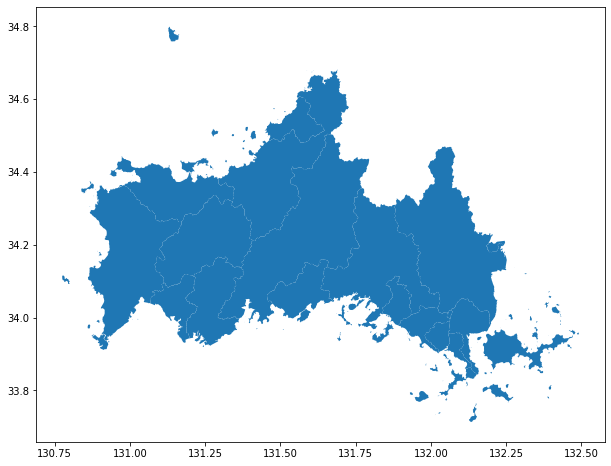

In [ ]:
# 一応，可視化しておく
yamaguchi.plot(figsize=(16, 8))

## 複数の地理情報を重ねる
国土交通省の展開するGISホームページ  https://nlftp.mlit.go.jp/ では国土数値情報，国土調査結果等が公表されている。

ここから「山口県に設置されたバス停留所のデータ」を取得する。
手順は以下のとおり：

1. 上記 Web ページにて「国土数値情報ダウンロードへ」をクリック
1. 国土数値情報ダウンロードのページにて「4.交通：交通：バス停留所（ポイント）」をクリック
1. バス停留所データのページにて「山口県」を選択し，山口県のデータ "P11-10_35_GML.zip" をダウンロード
1. "P11-10_35_GML.zip" を展開し，適当なディレクトリに設置



In [ ]:
# シェイプファイルからのデータ読み込み
path = '/content/drive/My Drive/BASE2/GeoData/P11-10_35_GML/P11-10_35-jgd-g_BusStop.shp'
bus_stop = gpd.read_file(path, encoding='shiftjis')

In [ ]:
# データの中身をみておく
bus_stop.head()

,P11_001,P11_002,P11_003_1,P11_003_2,P11_003_3,P11_003_4,P11_003_5,P11_003_6,P11_003_7,P11_003_8,P11_003_9,P11_003_10,P11_003_11,P11_003_12,P11_003_13,P11_003_14,P11_003_15,P11_003_16,P11_003_17,P11_003_18,P11_003_19,P11_004_1,P11_004_2,P11_004_3,P11_004_4,P11_004_5,P11_004_6,P11_004_7,P11_004_8,P11_004_9,P11_004_10,P11_004_11,P11_004_12,P11_004_13,P11_004_14,P11_004_15,P11_004_16,P11_004_17,P11_004_18,P11_004_19,geometry
0,小島,"1,1","石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"二条線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.69599 34.60392)
1,畠田,1,石見交通（株）,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,二条線,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.69991 34.60295)
2,保田,1,石見交通（株）,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,二条線,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.71020 34.60145)
3,北谷,"1,1,1","石見交通（株）,石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"小浜江崎線,萩線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.61574 34.62631)
4,帆柱,"1,1,1","石見交通（株）,石見交通（株）,防長交通（株）",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"小浜江崎線,萩線,尾浦入口・田万川〜弥富支所前〜梼の木",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (131.63634 34.62629)


In [ ]:
# 位置情報のみを確認 → バス停留所の緯度・経度が POINT として与えられている。
bus_stop.geometry.head()

0    POINT (131.69599 34.60392)
1    POINT (131.69991 34.60295)
2    POINT (131.71020 34.60145)
3    POINT (131.61574 34.62631)
4    POINT (131.63634 34.62629)
Name: geometry, dtype: geometry

ここまでで

- 山口県の地理情報データ (yamaguci)
- 山口県内のバス停留所データ (bus_stop)

が得られた。
これらを重ね合わせて可視化するには，ax を用いる。

ここで，ax は Artist と呼ばれるオブジェクトの一種である。

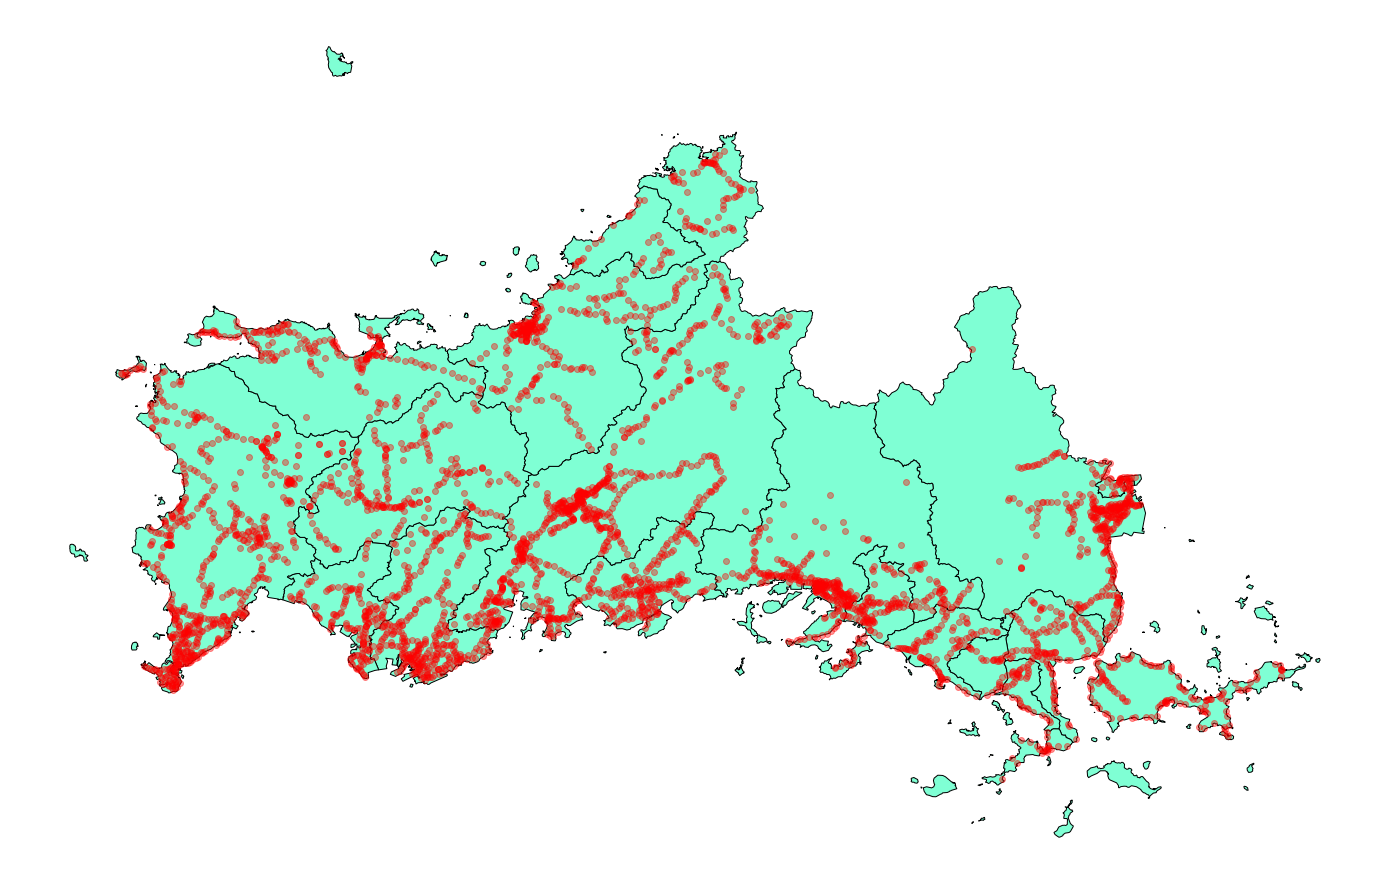

In [ ]:
fig, ax = plt.subplots(1, figsize=(32,16))

yamaguchi.plot(ax=ax, color='aquamarine', edgecolor="black")
bus_stop.plot(ax=ax, color='red', alpha=0.4)

ax.axis('off')
plt.show()

## （課題）
「国土数値情報ダウンロード」から「3.地域：施設：医療機関（ポイント）→ 山口県（平成26年)」の shape file をダウンロードし，山口県の地図と重ねて可視化せよ。